<a id="top"></a>
# Questionnaire results

Sections:
- [Define statistical tests](#stats)
- [Read and preprocess data](#read)
- [Demographics](#demographics)
- [Dementia](#dementia)
- [AI experience](#AI_experience)
- [Application scenarios](#application_scenarios)
- [Features & Priorities](#features_and_priorities)
- [Conclusion](#conclusion)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

<a id="stats"></a>
[top](#top)
# Statistical tests and plots

Convenience wrappers for statistical tests.

In [2]:
def ttest_ind(a, b, **kwargs):
    result = scipy.stats.ttest_ind(a, b, **kwargs)
    print(f't={result.statistic:2.3f}')
    print(f'p={result.pvalue:0.6f}')

In [3]:
def ttest_paired(a, b, **kwargs):
    result = scipy.stats.ttest_ind(a, b, **kwargs)
    print(f't={result.statistic:2.3f}')
    print(f'p={result.pvalue:0.6f}')

In [4]:
def draw_pie(df, col, category_orders, colormap=None,size=28, hole=0.2, showlegend=False, rotation=270, textinfo='percent+value', **kwargs):
    if colormap is not None:
        fig = px.pie(df, names=col, color=col, hole=hole,
                color_discrete_map=colormap, 
                category_orders={col: usefuless_categories},
                    **kwargs)
    else:
        fig = px.pie(df, names=col, color=col, hole=hole,
                category_orders=category_orders,
                    **kwargs)
        
    fig.update_traces(textinfo=textinfo, rotation=rotation, textfont_size=size, showlegend=showlegend,)
    fig.update_traces(direction='clockwise', sort=False, marker=dict(line=dict(color='#000000', width=1.5)))

    # legend
    if showlegend:
        fig.update_layout(legend = dict(font = dict(size = 20, color = "black")))

    fig.show()
    return fig

<a id="read"></a>
[top](#top)
# Read and preprocess data

In [5]:
df = pd.read_csv('questionnaire_results_Apr2024_anonymous.csv')

In [6]:
print(df.shape)
df.head(5)

(29, 34)


,Timestamp,"Consent Form\n\nPlease proceeding, please provide consent to taking part in the study by ticking the following boxes.","First of all, we would like to know whether you are a person with dementia or a supporter (e.g., carer, family member, nurse etc). \n\nIf you are filling this form in on behalf of a person with dementia, please select ""person with dementia"".",Age,Sex,How many years ago have you been diagnosed with dementia?,Ethnic background,What is the highest education level you achieved?,Have you ever been diagnosed with dementia or Alzheimer’s disease?,What specific type of dementia you've been diagnosed with?,...,Voice control. How important is it that you can also use your voice to talk to the app and it talks back to you (as opposed to just typing text in a textbox)?,"Empathy. When having a conversation with the app, how important is it that the AI displays empathy, feelings, and understanding?","Human in the loop. When using the app for therapeutic interventions, how important is it to use the app together with in-person sessions with a caregiver or doctor, rather than just using the app alone?","Data privacy. How important is it that the app stores as little personal data as possible (e.g., age, gender, past conversations)?",Data transparency. How important is it that the app is transparent and clear about which data it collects about you?,Data deletion. How important is it that your personal data can be deleted from the app at any time?,"Device. When using the app, which device(s) do you prefer (select 1 or more)",What do you estimate the impact of AI on dementia management and care could be?,"If you have any comments, thoughts or suggestions, you can share them with us here. \n\nNOTE: We're conducting a giveaway for a £100 Visa gift card, and one lucky participant from this survey will be selected. To enter the draw, kindly provide your email below. If you prefer to remain anonymous, you're welcome to do so, but please note that anonymous entries will not be eligible for the draw.",Unnamed: 33
0,2023/12/01 6:51:57 PM GMT+1,I confirm that I have read the information she...,NaN,80.0,Male,2.0,Welsh,Secondary education / High school,Yes,Alzheimer's disease,...,Very important,Not important,Very important,Very important,Very important,Very important,Laptop or personal computer,Prefer not to say,I have had to answer 'Prefer not to say' in se...,2.0
1,2023/12/01 9:43:27 PM GMT+1,I confirm that I have read the information she...,NaN,63.0,Female,0.0,European (Including Caucasian Australian),Bachelor's degree or equivalent,No,NaN,...,Very important,Very important,Important,Very important,Very important,Very important,Laptop or personal computer,Positive,I feel that using the AI app without help from...,NaN
2,2023/12/02 6:00:13 PM GMT+1,I confirm that I have read the information she...,NaN,76.0,Male,5.0,European (Including Caucasian Australian),"Postgraduate degree (Master’s, Doctorate, etc.)",Yes,Alzheimer's disease,...,Very important,Important,Important,Moderately important,Important,Moderately important,Smartphone;Laptop or personal computer,Positive,It's a provoking issue.,6.0
3,2023/12/11 11:28:22 AM GMT+1,I confirm that I have read the information she...,NaN,48.0,Female,NaN,European (Including Caucasian Australian),Bachelor's degree or equivalent,No,NaN,...,Very important,Very important,Very important,Very important,Very important,Very important,"Tablet (e.g, iPad)",Very positive,AI technology will be very important to allevi...,NaN
4,2023/12/11 11:45:55 AM GMT+1,I confirm that I have read the information she...,NaN,55.0,Male,0.0,European (Including Caucasian Australian),"Postgraduate degree (Master’s, Doctorate, etc.)",No,NaN,...,Very important,Very important,Very important,Very important,Very important,Very important,"Smartphone;Tablet (e.g, iPad)",Neutral or do not know,NaN,NaN


In [118]:
df.columns

Index(['Timestamp',
       'Consent Form\n\nPlease proceeding, please provide consent to taking part in the study by ticking the following boxes. ',
       'First of all, we would like to know whether you are a person with dementia or a supporter (e.g., carer, family member, nurse etc). \n\nIf you are filling this form in on behalf of a person with dementia, please select "person with dementia".',
       'Age', 'Sex',
       'How many years ago have you been diagnosed with dementia?',
       'Ethnic background',
       'What is the highest education level you achieved?',
       'Have you ever been diagnosed with dementia or Alzheimer’s disease?',
       'What specific type of dementia you've been diagnosed with?',
       'Could you describe any symptoms or experiences related to your diagnosis?',
       'Have you ever used digital apps in the context of dementia managements or treatment?',
       'Before starting this questionnaire, had you heard of AI Language Models such as Chat-GPT?

In [119]:
# shorten columns by limiting to the text up to the first "."
df = df.rename(lambda x: x if x.find('.')==-1 else x[:x.find('.')], axis='columns')
df.columns

Index(['Timestamp',
       'Consent Form\n\nPlease proceeding, please provide consent to taking part in the study by ticking the following boxes',
       'First of all, we would like to know whether you are a person with dementia or a supporter (e',
       'Age', 'Sex',
       'How many years ago have you been diagnosed with dementia?',
       'Ethnic background',
       'What is the highest education level you achieved?',
       'Have you ever been diagnosed with dementia or Alzheimer’s disease?',
       'What specific type of dementia you've been diagnosed with?',
       'Could you describe any symptoms or experiences related to your diagnosis?',
       'Have you ever used digital apps in the context of dementia managements or treatment?',
       'Before starting this questionnaire, had you heard of AI Language Models such as Chat-GPT?',
       'Did you ever use AI Language Models such as Chat-GPT (for either personal or professional use)?',
       'Please briefly describe how you us

In [120]:
df = df.rename(columns={
    'First of all, we would like to know whether you are a person with dementia or a supporter (e':'DementiaSupporter',
    'How many years ago have you been diagnosed with dementia?':'Diagnosed',
    'What is the highest education level you achieved?':'Education',
    "What specific type of dementia you've been diagnosed with?":'Dementia Type',
    'Could you describe any symptoms or experiences related to your diagnosis?':'Symptoms',
    "Have you ever used digital apps in the context of dementia managements or treatment?":"Digital Apps",
    "Before starting this questionnaire, had you heard of AI Language Models such as Chat-GPT?":"Heard of ChatGPT",
    "Did you ever use AI Language Models such as Chat-GPT (for either personal or professional use)?":"Used ChatGPT",
    "What do you estimate the impact of AI on dementia management and care could be?":"Impact",
    'If you have any comments, thoughts or suggestions, you can share them with us here':'Comments',
})

In [121]:
print(df.columns)

Index(['Timestamp',
       'Consent Form\n\nPlease proceeding, please provide consent to taking part in the study by ticking the following boxes',
       'DementiaSupporter', 'Age', 'Sex', 'Diagnosed', 'Ethnic background',
       'Education',
       'Have you ever been diagnosed with dementia or Alzheimer’s disease?',
       'Dementia Type', 'Symptoms', 'Digital Apps', 'Heard of ChatGPT',
       'Used ChatGPT',
       'Please briefly describe how you used AI language models',
       'Companionship', 'Dementia-related information',
       'Dementia-related information including personal data', 'Navigation',
       'Reading aid', 'Writing aid', 'Therapy aid',
       'Do you have any comments regarding these application scenarios? Can you think of any other applications scenarios not mentioned here? (feel free to skip this question if 'no')',
       'Ease of use', 'Voice control', 'Empathy', 'Human in the loop',
       'Data privacy', 'Data transparency', 'Data deletion', 'Device',
      

In [122]:
# shorten values
df['Ethnic background'] = [x[:x.find('(')-1] if x.find('(')>0 else x[:x.find('.')] if x.find('.')>0 else x for x in df['Ethnic background']]


In [123]:
df.tail(5)

,Timestamp,"Consent Form\n\nPlease proceeding, please provide consent to taking part in the study by ticking the following boxes",DementiaSupporter,Age,Sex,Diagnosed,Ethnic background,Education,Have you ever been diagnosed with dementia or Alzheimer’s disease?,Dementia Type,...,Voice control,Empathy,Human in the loop,Data privacy,Data transparency,Data deletion,Device,Impact,Comments,Unnamed: 33
24,2024/01/24 5:58:27 PM GMT+1,I confirm that I have read the information she...,NaN,36.0,Male,0.0,Prefer not to answer,Prefer not to answer,No,NaN,...,Very important,Very important,Very important,Very important,Very important,Very important,Smartphone,Very positive,EMAIL REMOVED,NaN
25,2024/01/25 9:56:12 AM GMT+1,I confirm that I have read the information she...,NaN,58.0,Female,2.0,European,Secondary education / High school,Yes,Alzheimer's disease,...,Very important,Important,Moderately important,It doesn't matter as long as it's securely sto...,It's doesn’t matter as long as I have access t...,Very important,"Smartphone;Tablet (e.g, iPad)",Very positive,NaN,NaN
26,2024/02/15 6:09:50 PM GMT+1,I confirm that I have read the information she...,Person with dementia,67.0,Male,10.0,European,Vocational training / Trade certificate,Yes,Alzheimer's disease,...,Important,Important,Important,Important,Very important,Important,"Smartphone;Tablet (e.g, iPad);Laptop or person...",Very positive,NaN,NaN
27,2024/02/23 2:50:35 AM GMT+1,I confirm that I have read the information she...,"Supporter (e.g., carer, family member, nurse etc)",55.0,Prefer not to answer,NaN,Asian,"Postgraduate degree (Master’s, Doctorate, etc.)",No,NaN,...,Not important,Not important,Not important,Very important,Very important,Very important,"Tablet (e.g, iPad)",Very negative,NaN,NaN
28,2024/02/29 12:11:14 PM GMT+1,I confirm that I have read the information she...,Person with dementia,63.0,Female,9.0,European,Secondary education / High school,Yes,Alzheimer's disease,...,Very important,Important,Important,Very important,Very important,Very important,"Tablet (e.g, iPad)",Positive,NaN,NaN


In [124]:
# create categorical variables
usefuless_categories = ['Very useful', 'Useful', 'Moderately useful', 
                        'Slightly useful', 'Not useful at all', 'Prefer not to say']
importance_categories = ['Very important', 'Important', 'Moderately important', 
                          'Slightly important',  'Not important', 'Prefer not to say',
                         "It doesn't matter as long as it's securely stored somewhere",
                        "It's doesn’t matter as long as I have access to the data being collected"]

df['Sex'] = pd.Categorical(df['Sex'].str.strip(), categories=['Male', 'Female', 'Nonbinary', 'Prefer not to answer'])
df.loc[df['Sex'].isna(), 'Sex'] = 'Prefer not to answer'

# application scenarios        
df['Companionship'] = pd.Categorical(df['Companionship'], categories=usefuless_categories)
df['Dementia-related information'] = pd.Categorical(df['Dementia-related information'], categories=usefuless_categories)
df['Dementia-related information including personal data'] = pd.Categorical(df['Dementia-related information including personal data'], categories=usefuless_categories)
df['Navigation'] = pd.Categorical(df['Navigation'], categories=usefuless_categories)
df['Reading aid'] = pd.Categorical(df['Reading aid'], categories=usefuless_categories)
df['Writing aid'] = pd.Categorical(df['Writing aid'], categories=usefuless_categories)
df['Therapy aid'] = pd.Categorical(df['Therapy aid'], categories=usefuless_categories)

# features & priorities
df['Ease of use'] = pd.Categorical(df['Ease of use'], categories=importance_categories)
df['Voice control'] = pd.Categorical(df['Voice control'], categories=importance_categories)
df['Human in the loop'] = pd.Categorical(df['Human in the loop'], categories=importance_categories)
df['Data privacy'] = pd.Categorical(df['Data privacy'], categories=importance_categories)
df['Data transparency'] = pd.Categorical(df['Data transparency'], categories=importance_categories)
df['Data deletion'] = pd.Categorical(df['Data deletion'], categories=importance_categories)

# device: replace values
df['Device'] = df['Device'].replace({'Laptop or personal computer':'Laptop/PC', 
                      'Tablet (e.g, iPad)': 'Tablet',
                     'Smartphone;Laptop or personal computer':'Smartphone; Laptop/PC',
                      'Smartphone;Tablet (e.g, iPad)': 'Smartphone; Tablet',
                    'Tablet (e.g, iPad);Laptop or personal computer': 'Smartphone; Laptop/PC',
                      'Smartphone;Tablet (e.g, iPad);Laptop or personal computer':'All devices',
                     })

# summarize some of the respondents' own ethnic categories
df['Ethnic background'] = df['Ethnic background'].replace({
        'White english' : 'European',
        'Welsh': 'European',
        'White European ': 'European',
})

df['Education'] = df['Education'].replace({
    'Undergrad-Diploma ': "Bachelor's degree or equivalent", 
})

df['Dementia Type'] = df['Dementia Type'].replace({
    'Mixed Dementia ': 'Mixed dementia',
})

In [125]:
# split into separate dataframes for people with dementia and supporters
df_dementia = df[df['Have you ever been diagnosed with dementia or Alzheimer’s disease?']=='Yes'].copy()
df_supporter = df[df['Have you ever been diagnosed with dementia or Alzheimer’s disease?']=='No'].copy()

print(df_dementia.shape)
print(df_supporter.shape)

(15, 34)
(14, 34)


In [126]:
df_dementia = df[df['Have you ever been diagnosed with dementia or Alzheimer’s disease?']=='Yes'].copy()
df_dementia['Dementia-related information']

0       Slightly useful
2           Very useful
7     Prefer not to say
14          Very useful
15          Very useful
16    Not useful at all
17               Useful
18    Not useful at all
19    Not useful at all
20          Very useful
21      Slightly useful
22               Useful
25               Useful
26          Very useful
28               Useful
Name: Dementia-related information, dtype: category
Categories (6, object): ['Very useful', 'Useful', 'Moderately useful', 'Slightly useful', 'Not useful at all', 'Prefer not to say']

<a id="demographics"></a>
[top](#top)
# Demographics

In [127]:
# pie chart settings
hole = 0.25

demo_colormap = {'Male':'mediumblue',
        'Female':'fuchsia',
        'Nonbinary':'salmon',
        'European': 'dodgerblue',
        'Asian' : 'darkviolet',
        'Mixed background': 'orangered',
        'Prefer not to answer': 'gray',
       np.nan:'gray'} 

demo_colormap.update({
  "Secondary education / High school": 'cornsilk',
  "Postgraduate degree (Master’s, Doctorate, etc.)": 'mediumvioletred',
  "Vocational training / Trade certificate": 'lime',
  "Bachelor's degree or equivalent": 'sandybrown',  
})

demo_category_order = [
    'European', 'Asian', 'Mixed background', 'Prefer not to answer', 
    'Male', 'Female', 'Nonbinary', np.nan
]



In [128]:
# 1.1 age
print(f"[PwD] Age range: {int(df_dementia['Age'].min())}-{int(df_dementia['Age'].max())}, mean={df_dementia['Age'].mean():2.1f}")
print(f"[Supporter] Age range: {int(df_supporter['Age'].min())}-{int(df_supporter['Age'].max())}, mean={df_supporter['Age'].mean():2.1f}")

[PwD] Age range: 58-88, mean=72.2
[Supporter] Age range: 32-70, mean=53.6


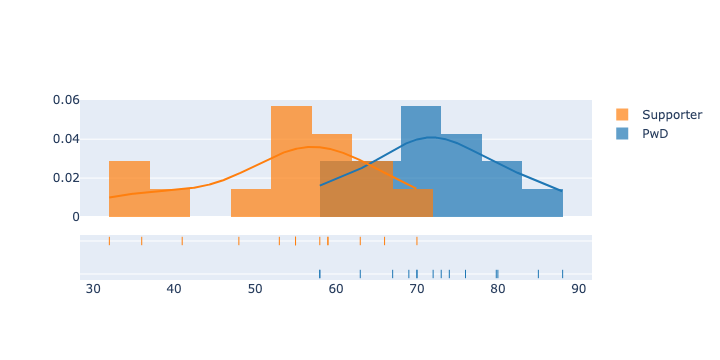

In [129]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = df_dementia['Age']
x2 = df_supporter['Age']

# Group data together
hist_data = [x1, x2]

group_labels = ['PwD', 'Supporter']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
fig.show()
fig.write_image('age.png', scale=3)

In [130]:
# 1.1
# independent samples t-test on age
ttest_ind(df_dementia['Age'], df_supporter['Age'])

t=5.059
p=0.000026


people with dementia:
Male: 7
Female: 7
Nonbinary: 1

caregiver:
Female: 11
Male: 2
Prefer not to answer: 1


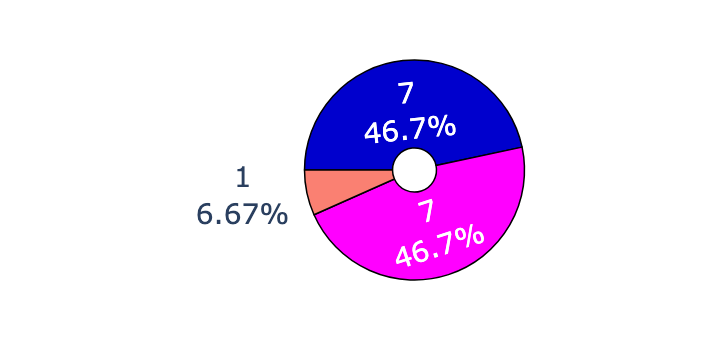

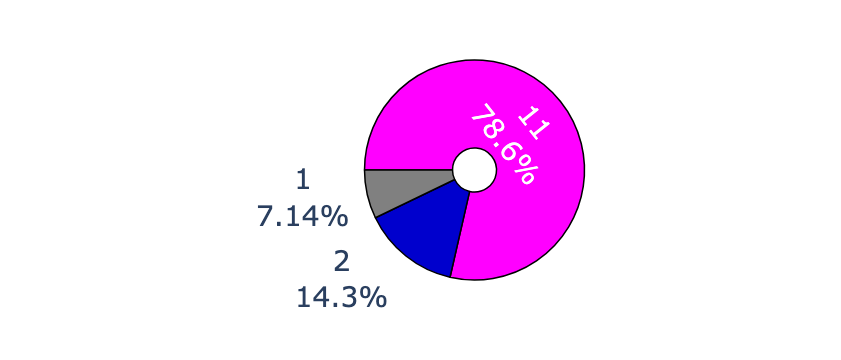

In [101]:
# 1.2 sex
print('people with dementia:')
for x in df_dementia['Sex'].unique():
    print(f"{x}: {sum(df_dementia['Sex'] == x)}")

print('\ncaregiver:')
for x in df_supporter['Sex'].unique():
    print(f"{x}: {sum(df_supporter['Sex'] == x)}")

# fig = px.pie(df_dementia, names='Ethnic background')
# fig.show()
fig = draw_pie(df_dementia, 'Sex', category_orders=demo_category_order, colormap=demo_colormap)
fig.write_image('sex_dementia.png', scale=3)
fig = draw_pie(df_supporter, 'Sex', category_orders=demo_category_order, colormap=demo_colormap)
fig.write_image('sex_supporter.png', scale=3)

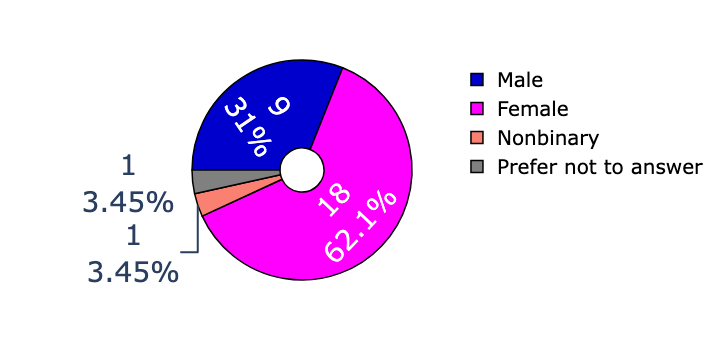

In [77]:
fig = draw_pie(df, 'Sex', category_orders=demo_category_order, colormap=demo_colormap, showlegend=True)
fig.write_image('sex_categories.png', scale=3)

In [22]:
# 1.2: Fisher's exact test for men vs women
table = np.array([
    [(df_dementia['Sex']=='Male').sum(), (df_dementia['Sex']=='Female').sum()],
    [(df_supporter['Sex']=='Male').sum(), (df_supporter['Sex']=='Female').sum()],
]).T

print('table:', table)
res = scipy.stats.fisher_exact(table, alternative='two-sided')
print(f'Odds ratio: {res[0]}, p={res[1]:0.4f}')

table: [[ 7  2]
 [ 7 11]]
Odds ratio: 5.5, p=0.1032


Dementia:
European: 14
Asian: 1

Supporter:
European: 9
Mixed background: 2
Prefer not to answer: 2
Asian: 1


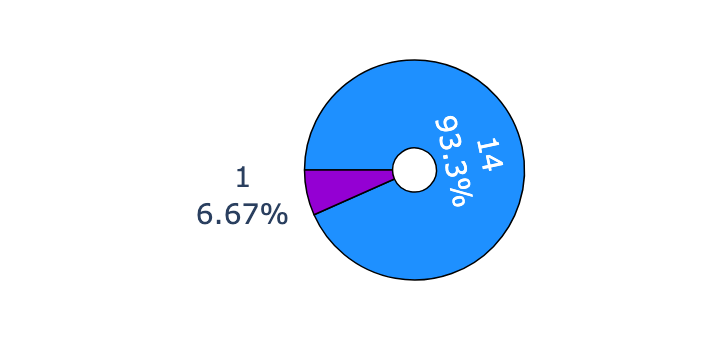

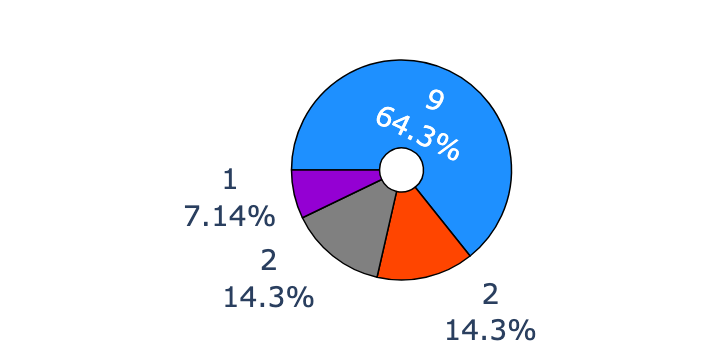

In [84]:
# 1.4
print('Dementia:')
for ethnicity in df_dementia['Ethnic background'].unique():
    print(f"{ethnicity}: {sum(df_dementia['Ethnic background'] == ethnicity)}")
print('\nSupporter:')
for ethnicity in df_supporter['Ethnic background'].unique():
    print(f"{ethnicity}: {sum(df_supporter['Ethnic background'] == ethnicity)}")
    
fig = px.pie(df_supporter, names='Ethnic background')

fig = draw_pie(df_dementia, 'Ethnic background', category_orders=demo_category_order, colormap=demo_colormap)
fig.write_image('ethnic_dementia.png', scale=3)
fig = draw_pie(df_supporter, 'Ethnic background', category_orders=demo_category_order, colormap=demo_colormap)
fig.write_image('ethnic_supporter.png', scale=3)

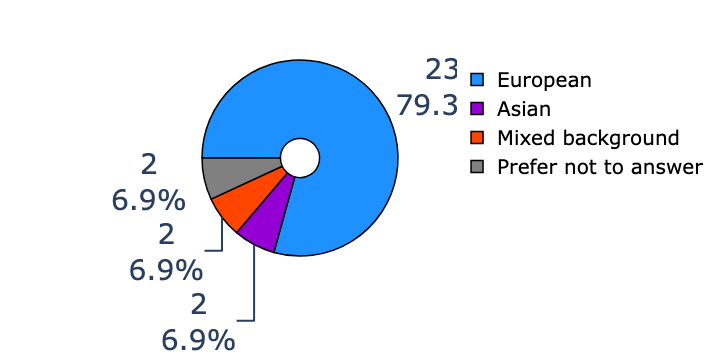

In [85]:
fig = draw_pie(df, 'Ethnic background', category_orders=demo_category_order, colormap=demo_colormap, showlegend=True)
fig.write_image('ethnic_categories.png', scale=3)

Dementia:
Secondary education / High school: 9
Postgraduate degree (Master’s, Doctorate, etc.): 3
Vocational training / Trade certificate: 2
Bachelor's degree or equivalent: 1

Supporter:
Bachelor's degree or equivalent: 7
Postgraduate degree (Master’s, Doctorate, etc.): 5
Vocational training / Trade certificate: 1
Prefer not to answer: 1


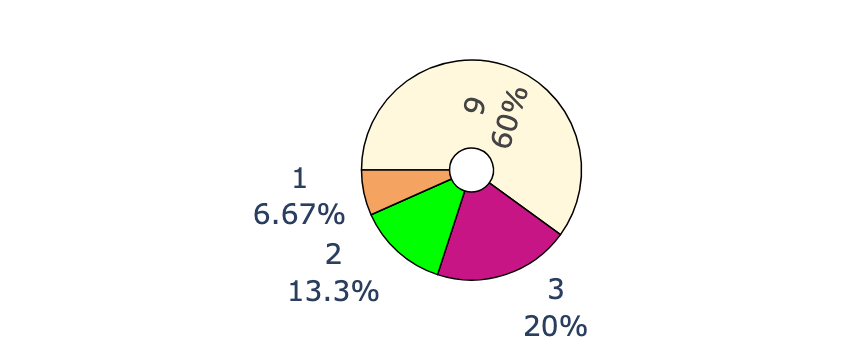

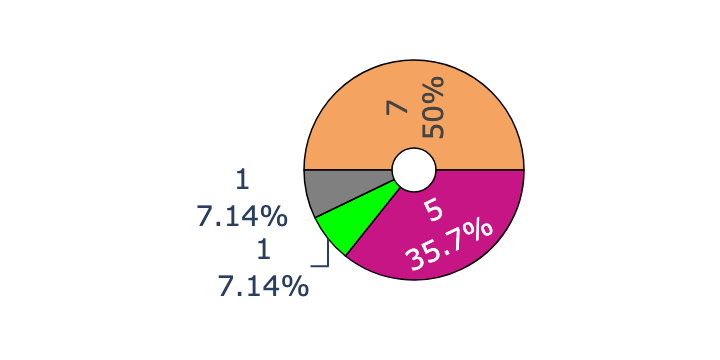

In [96]:
# 1.5
print('Dementia:')
for edu in df_dementia['Education'].unique():
    print(f"{edu}: {sum(df_dementia['Education'] == edu)}")
print('\nSupporter:')
for edu in df_supporter['Education'].unique():
    print(f"{edu}: {sum(df_supporter['Education'] == edu)}")

fig = draw_pie(df_dementia, 'Education', category_orders=demo_category_order, colormap=demo_colormap, showlegend=False)
fig.write_image('education_dementia.png', scale=3)
fig = draw_pie(df_supporter, 'Education', category_orders=demo_category_order, colormap=demo_colormap)
fig.write_image('education_supporter.png', scale=3)

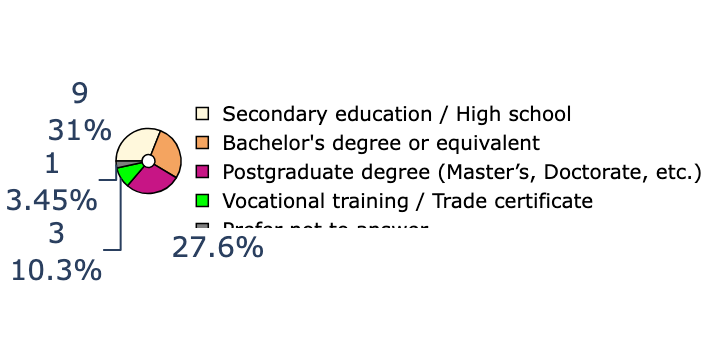

In [95]:
fig = draw_pie(df, 'Education', category_orders=demo_category_order, colormap=demo_colormap, showlegend=True)
fig.write_image('education_categories.png', scale=3)

<a id="dementia"></a>
[top](#top)
# Dementia

In [131]:
# 1.7 How many years ago diagnosed with dementia
print(f"Diagnosed range: {int(df_dementia['Diagnosed'].min())}-{int(df_dementia['Diagnosed'].max())}, mean={df_dementia['Diagnosed'].mean():2.1f}")

Diagnosed range: 1-13, mean=5.1


In [132]:
# no significant relationship between age and when diagnosed
scipy.stats.pearsonr(df_dementia['Diagnosed'], df_dementia['Age'])

PearsonRResult(statistic=-0.21389941123575348, pvalue=0.44398315143809003)

Alzheimer's disease: 9
Mixed dementia: 2
Vascular dementia: 1
Prefer not to answer: 1
Fronto-temporal dementia: 1
Lewy body dementia: 1


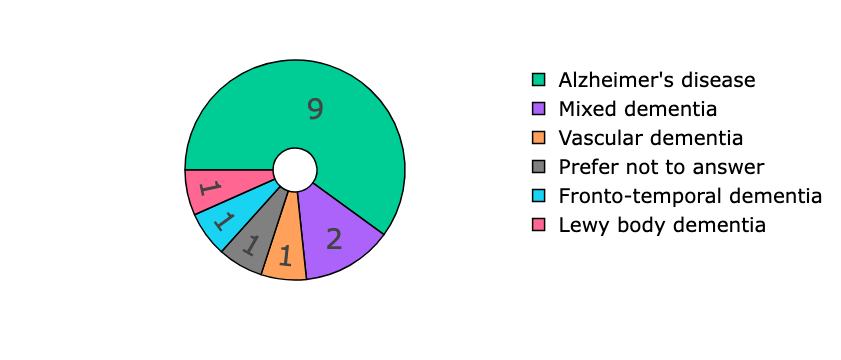

In [133]:
# 2.1
for dem in df_dementia['Dementia Type'].unique():
    print(f"{dem}: {sum(df_dementia['Dementia Type'] == dem)}")
    
# fig = px.pie(df_dementia, names='Dementia Type')
# fig.show()
fig = draw_pie(df_dementia, 'Dementia Type', textinfo='value', category_orders=demo_category_order, colormap=demo_colormap, showlegend=True)
fig.write_image('dementia_type.png', scale=3)



In [134]:
# 2.2
for symptom in df_dementia['Symptoms'].unique():
    print(symptom, '\n-------')

short term memory failures 
-------
Total blank in the mornings 
-------
Of Lewy Body and Parkinson's . Hallucinations, Visual & Auditory ,Tremors, Gait &Balance. 
-------
Short term memory loss  
-------
nan 
-------
Short term memory failures, in recording and recalling 
-------
Withdrawn from people / forgetting names & where I put things   
-------
Silly question. There are a multitude of symptoms associated with Alzheimer's disease.  
-------
Inability to perform everyday tasks. No short term memory now. Confusion about who people are, even family members. Insomnia and agitation. Repetitive behaviour such as folding tissues. Unable to follow conversations and confusion between the programme and adverts on TV. Personal hygiene now poor so need assistance to wash and dress.  
-------
Loss of memory, unable to speak properly, difficulty understanding conversations 
-------
Difficult to balance on one side 
-------
Shakes, unstable, memory loss, temper, needing assistance, voice, can’

<a id="AI_experience"></a>
[top](#top)
# AI Experience

In [53]:
# 3.1
for x in df_dementia['Digital Apps'].unique():
    print(f"{x}: {sum(df_dementia['Digital Apps'] == x)}")
    
fig = px.pie(df_dementia, names='Digital Apps')
fig.show()

Yes: 3
No: 12


In [54]:
# 3.1
for x in df_supporter['Digital Apps'].unique():
    print(f"{x}: {sum(df_supporter['Digital Apps'] == x)}")
    
fig = px.pie(df_supporter, names='Digital Apps')
fig.show()

Yes: 5
No: 8
Prefer not to say: 1


In [55]:
# 3.2
for x in df_dementia['Heard of ChatGPT'].unique():
    print(f"{x}: {sum(df_dementia['Heard of ChatGPT'] == x)}")
    
fig = px.pie(df_dementia, names='Heard of ChatGPT')
fig.show()

Yes: 6
No: 9


In [56]:
# 3.2
for x in df_supporter['Heard of ChatGPT'].unique():
    print(f"{x}: {sum(df_supporter['Heard of ChatGPT'] == x)}")
    
fig = px.pie(df_supporter, names='Heard of ChatGPT')
fig.show()

Yes: 12
No: 2


In [57]:
# 3.3
for x in df_dementia['Used ChatGPT'].unique():
    print(f"{x}: {sum(df_dementia['Used ChatGPT'] == x)}")
    
fig = px.pie(df_dementia, names='Used ChatGPT')
fig.show()

Prefer not to say: 1
No: 12
Yes: 2


In [58]:
# 3.3
for x in df_supporter['Used ChatGPT'].unique():
    print(f"{x}: {sum(df_supporter['Used ChatGPT'] == x)}")
    
fig = px.pie(df_supporter, names='Used ChatGPT')
fig.show()

Yes: 5
No: 8
Prefer not to say: 1


In [59]:
# 3.4
for x in df_dementia['Please briefly describe how you used AI language models'].unique():
    print(x, '\n-------')

nan 
-------
I have used AI language models to try to disrupt the heteronormative oppression of dementia care that exists in the UK and around the world. It’s not only cisgender white folks dealing with dementia l But look how disproportionate your data sets are. Shameful. 
-------
I use ChatGPT to gather information, links and quotes.  
-------


In [60]:
# 3.4
for x in df_supporter['Please briefly describe how you used AI language models'].unique():
    print(x, '\n-------')

For Patient and Public Involvement Networks, Universities, and as a carer for my Husband who had Dementia 
-------
To discover information on various topics encompassing dementia, including the types, symptoms and possible outcomes of therapies used in behaviour management in dementia 
-------
I just tried a few examples to understand the type of responses.

My son-in-law trialled it at high school with students who gave the responses 13 out of 20.. 
-------
nan 
-------
have used extension programs in web browsers to synthesise text and videos 
-------
For writing reports 
-------


<a id="application_scenarios"></a>
[top](#top)
# Application scenarios

In [61]:
# pie chart settings
hole = 0.25

# colormap from: https://pbs.twimg.com/media/D3xax5AXoAEGPNX.jpg:large
colormap = {'Not useful at all':'#004CA3',
            'Slightly useful':'#8A51A5',
            'Moderately useful':'#F47B89',
            'Useful':'#FFA47E',
            'Very useful': '#FFFFA6', 
           'Prefer not to say':'white'}

colormap = {'Not useful at all':'mediumblue',
        'Slightly useful':'cornflowerblue',
        'Moderately useful':'darkseagreen',
        'Useful':'salmon',
        'Very useful': 'red', 
       'Prefer not to say':'gray'} 


In [63]:
# 4.1
for x in df_dementia['Companionship'].unique():
    print(f"{x}: {sum(df_dementia['Companionship'] == x)}")
draw_pie(df_dementia, 'Companionship', showlegend=False)

Not useful at all: 4
Very useful: 6
Slightly useful: 3
Useful: 2


In [64]:
# 4.1
for x in df_supporter['Companionship'].unique():
    print(f"{x}: {sum(df_supporter['Companionship'] == x)}")
fig = draw_pie(df_supporter, 'Companionship', showlegend=False)

Very useful: 5
Useful: 2
Moderately useful: 1
Slightly useful: 2
Not useful at all: 3
Prefer not to say: 1


In [65]:
# 4.2
for x in df_dementia['Dementia-related information'].unique():
    print(f"{x}: {sum(df_dementia['Dementia-related information'] == x)}")
    
draw_pie(df_dementia, 'Dementia-related information')

Slightly useful: 2
Very useful: 5
Prefer not to say: 1
Not useful at all: 3
Useful: 4


In [66]:
# 4.2
for x in df_supporter['Dementia-related information'].unique():
    print(f"{x}: {sum(df_supporter['Dementia-related information'] == x)}")
    
draw_pie(df_supporter, 'Dementia-related information')

Very useful: 4
Useful: 2
Moderately useful: 3
Slightly useful: 3
Not useful at all: 2


In [67]:
# 4.3
for x in df_dementia['Dementia-related information including personal data'].unique():
    print(f"{x}: {sum(df_dementia['Dementia-related information including personal data'] == x)}")
    
draw_pie(df_dementia, 'Dementia-related information including personal data')

Not useful at all: 4
Very useful: 5
Prefer not to say: 2
Moderately useful: 1
Useful: 3


In [68]:
# 4.3
for x in df_supporter['Dementia-related information including personal data'].unique():
    print(f"{x}: {sum(df_supporter['Dementia-related information including personal data'] == x)}")
    
draw_pie(df_supporter, 'Dementia-related information including personal data')

Moderately useful: 2
Very useful: 5
Prefer not to say: 1
Not useful at all: 5
Useful: 1


In [69]:
# 4.4
for x in df_dementia['Navigation'].unique():
    print(f"{x}: {sum(df_dementia['Navigation'] == x)}")
    
draw_pie(df_dementia, 'Navigation')

Prefer not to say: 2
Very useful: 9
Not useful at all: 4


In [70]:
# 4.4
for x in df_supporter['Navigation'].unique():
    print(f"{x}: {sum(df_supporter['Navigation'] == x)}")
    
draw_pie(df_supporter, 'Navigation')

Slightly useful: 4
Very useful: 6
Moderately useful: 2
Useful: 1
Not useful at all: 1


In [71]:
# 4.5
for x in df_dementia['Reading aid'].unique():
    print(f"{x}: {sum(df_dementia['Reading aid'] == x)}")
    
draw_pie(df_dementia, 'Reading aid')

Slightly useful: 2
Useful: 2
Prefer not to say: 1
Very useful: 7
Not useful at all: 2
Moderately useful: 1


In [72]:
# 4.5
for x in df_supporter['Reading aid'].unique():
    print(f"{x}: {sum(df_supporter['Reading aid'] == x)}")
    
draw_pie(df_supporter, 'Reading aid')

Slightly useful: 3
Very useful: 5
Useful: 4
Not useful at all: 2


In [73]:
# 4.6
for x in df_dementia['Writing aid'].unique():
    print(f"{x}: {sum(df_dementia['Writing aid'] == x)}")
    
draw_pie(df_dementia, 'Writing aid', rotation=150)

Slightly useful: 2
Useful: 3
Prefer not to say: 1
Very useful: 6
Moderately useful: 2
Not useful at all: 1


In [74]:
# 4.6
for x in df_supporter['Writing aid'].unique():
    print(f"{x}: {sum(df_supporter['Writing aid'] == x)}")
    
draw_pie(df_supporter, 'Writing aid')

Slightly useful: 2
Very useful: 6
Moderately useful: 2
Useful: 2
Not useful at all: 2


In [75]:
# 4.7
for x in df_dementia['Therapy aid'].unique():
    print(f"{x}: {sum(df_dementia['Therapy aid'] == x)}")
draw_pie(df_dementia, 'Therapy aid')

Moderately useful: 2
Useful: 3
Slightly useful: 2
Very useful: 6
Not useful at all: 2


In [77]:
# 4.7
for x in df_supporter['Therapy aid'].unique():
    print(f"{x}: {sum(df_supporter['Therapy aid'] == x)}")
    
draw_pie(df_supporter, 'Therapy aid')

Very useful: 6
Moderately useful: 1
Slightly useful: 2
Useful: 2
Not useful at all: 3


In [133]:
# Mean opinion scores
mos_dementia = df_dementia.loc[:, 'Companionship':'Therapy aid'].replace({
                    'Prefer not to say':-1, 
                    'Not useful at all': 1,
                    'Slightly useful': 2, 
                    'Moderately useful': 3, 
                    'Useful': 4,
                    'Very useful': 5,
                     }).reset_index().melt(id_vars='index')

mos_supporter = df_supporter.loc[:, 'Companionship':'Therapy aid'].replace({
                    'Prefer not to say':-1, 
                    'Not useful at all': 1,
                    'Slightly useful': 2, 
                    'Moderately useful': 3, 
                    'Useful': 4,
                    'Very useful': 5,
                     }).reset_index().melt(id_vars='index')

# remove 'prefer not to say' responses
mos_dementia = mos_dementia[mos_dementia.value != -1]
mos_supporter = mos_supporter[mos_supporter.value != -1]

mos_dementia['group'] = 'Dementia'
mos_supporter['group'] = 'Supporter'

# concat in one dataframe
mos = pd.concat((mos_dementia, mos_supporter), axis=0)

In [134]:
# shorten labels
mos['variable'] = mos['variable'].replace({
    'Dementia-related information': 'Dementia\nInfo',
    'Dementia-related information including personal data': 'Dementia Info\n+ Personal Data'
})

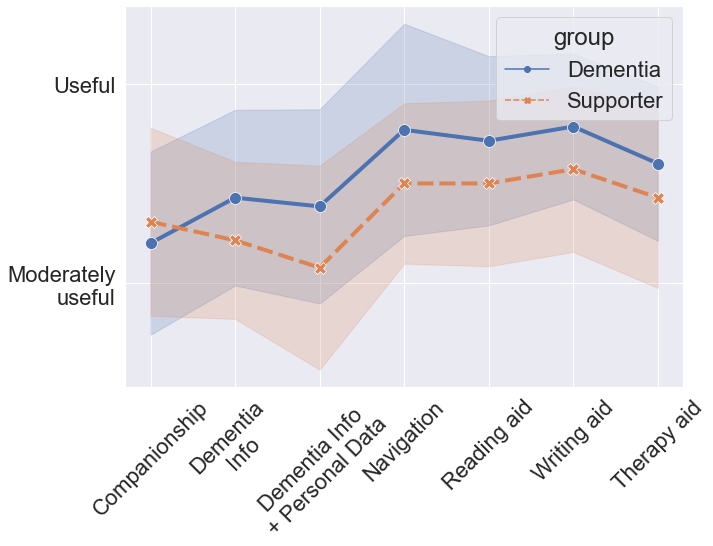

In [135]:
sns.set(rc={'figure.figsize':(10, 7)}, font_scale=2)

sns.set_style("darkgrid")
ax = sns.lineplot(data=mos, y="value", x="variable", 
              hue='group', style='group', errorbar='se', markers=True,
                  linewidth=4, markersize=12,
)
ax.tick_params(axis='x', rotation=45)
ax.set_yticks([3, 4])
ax.set_yticklabels(['Moderately\nuseful', 'Useful'])
ax.set_ylabel(''); ax.set_xlabel('')

plt.savefig('application_scenarios_summary.png', bbox_inches='tight', dpi=300)

In [136]:
# Mean opinion scores (averaged within PwD and supporter groups)
mos_mean = mos.groupby(['group', 'variable']).mean()['value']
unstacked = mos_mean.unstack(level=0)
print(unstacked)

group                           Dementia  Supporter
variable                                           
Companionship                   3.200000   3.307692
Dementia\nInfo                  3.428571   3.214286
Dementia Info\n+ Personal Data  3.384615   3.076923
Navigation                      3.769231   3.500000
Reading aid                     3.714286   3.500000
Therapy aid                     3.600000   3.428571
Writing aid                     3.785714   3.571429


In [137]:
print('Correlation for MOS Dementia vs Supporter') 
scipy.stats.pearsonr(unstacked['Dementia'], unstacked['Supporter'])

Correlation for MOS Dementia vs Supporter


(0.7928189002526143, 0.033445875256992635)

In [138]:
print('Paired samples t-test for MOS Dementia vs Supporter') 
ttest_paired(unstacked['Dementia'], unstacked['Supporter'])

Paired samples t-test for MOS Dementia vs Supporter
t=1.699
p=0.115137


In [139]:
df_dementia_encoded = df_dementia.replace({
                    'Prefer not to say':pd.NA, 
                    'Not useful at all': 1,
                    'Slightly useful': 2, 
                    'Moderately useful': 3, 
                    'Useful': 4,
                    'Very useful': 5,
                     })

df_supporter_encoded = df_supporter.replace({
                    'Prefer not to say':pd.NA, 
                    'Not useful at all': 1,
                    'Slightly useful': 2, 
                    'Moderately useful': 3, 
                    'Useful': 4,
                    'Very useful': 5,
                     })

In [140]:
# for each participant, average the scores across the scenarios
df_dementia_encoded['scenario_average'] = df_dementia_encoded.loc[:, 'Companionship':'Therapy aid'].mean(axis=1)
df_supporter_encoded['scenario_average'] = df_supporter_encoded.loc[:, 'Companionship':'Therapy aid'].mean(axis=1)

print(f"Dementia corr(Age, mean response):\n\t {scipy.stats.pearsonr(df_dementia_encoded['Age'], df_dementia_encoded['scenario_average'])}")
print(f"Supporter corr(Age, mean response):\n\t {scipy.stats.pearsonr(df_supporter_encoded['Age'], df_supporter_encoded['scenario_average'])}")

Dementia corr(Age, mean response):
	 (-0.6191892958030419, 0.013838862699362117)
Supporter corr(Age, mean response):
	 (-0.36242862370018025, 0.20284387565331172)


In [141]:
tmp = pd.concat((df_dementia_encoded.Sex.replace({'Male':0, 'Female':1, 'Nonbinary':pd.NA}), df_dementia_encoded['scenario_average']), axis=1).dropna()
print(f"Dementia corr(Sex, mean response):\n\t {scipy.stats.pearsonr(tmp['Sex'], tmp['scenario_average'])}")
tmp = pd.concat((df_supporter_encoded.Sex.replace({'Male':0, 'Female':1, 'Nonbinary':pd.NA}), df_supporter_encoded['scenario_average']), axis=1).dropna()
print(f"Supporter corr(Sex, mean response):\n\t {scipy.stats.pearsonr(tmp['Sex'], tmp['scenario_average'])}")

Dementia corr(Sex, mean response):
	 (0.18296268296261384, 0.5312635631483706)
Supporter corr(Sex, mean response):
	 (-0.18492039882692596, 0.5453034847436957)


In [142]:
print(f"Dementia corr(Years since Diagnosed, mean response):\n\t {scipy.stats.pearsonr(df_dementia_encoded['Diagnosed'], df_dementia_encoded['scenario_average'])}")

Dementia corr(Years since Diagnosed, mean response):
	 (0.22267770489356045, 0.4250444220050822)


In [93]:
# Correlation (Years since Diagnosed, Scenario) for PwD
for col in ('Companionship', 'Dementia-related information',
       'Dementia-related information including personal data', 'Navigation',
       'Reading aid', 'Writing aid', 'Therapy aid'):
    tmp = pd.concat((df_dementia_encoded['Diagnosed'], df_dementia_encoded[col]), axis=1)
    tmp = tmp.dropna()
    print(f"{col}:\n\t {scipy.stats.spearmanr(tmp['Diagnosed'], tmp[col])}")

Companionship:
	 SpearmanrResult(correlation=-0.018847136376329194, pvalue=0.9468466437604481)
Dementia-related information:
	 SpearmanrResult(correlation=0.291626424580499, pvalue=0.31170755342081613)
Dementia-related information including personal data:
	 SpearmanrResult(correlation=-0.03350477936380568, pvalue=0.9134722803340787)
Navigation:
	 SpearmanrResult(correlation=0.11197580205970206, pvalue=0.7157067506626545)
Reading aid:
	 SpearmanrResult(correlation=0.21367608086182116, pvalue=0.4632537635115125)
Writing aid:
	 SpearmanrResult(correlation=0.21594530737294923, pvalue=0.4584032755495928)
Therapy aid:
	 SpearmanrResult(correlation=0.2272175429363438, pvalue=0.4154155956404152)


In [96]:
# PwD: Correlation (Age, Response) for each scenario
for col in ('Companionship', 'Dementia-related information',
       'Dementia-related information including personal data', 'Navigation',
       'Reading aid', 'Writing aid', 'Therapy aid'):
    tmp = pd.concat((df_dementia_encoded['Age'], df_dementia_encoded[col]), axis=1).dropna(axis=0)
    print(f"{col}:\n\t {scipy.stats.pearsonr(tmp['Age'], tmp[col])}")

Companionship:
	 (-0.6430456357582875, 0.009711643844178686)
Dementia-related information:
	 (-0.5446575553424655, 0.0440191898899315)
Dementia-related information including personal data:
	 (-0.6068850437798804, 0.027848910165832668)
Navigation:
	 (-0.3500131681168319, 0.2410421048645201)
Reading aid:
	 (-0.6185246965862906, 0.01837471516996435)
Writing aid:
	 (-0.7577512061196899, 0.0016915121888104994)
Therapy aid:
	 (-0.5976504345604268, 0.01862659275480646)


In [98]:
# Relationship between sex and the scenarios
Sex = df_dementia_encoded['Sex'].replace(
    {'Male': 0, 
     'Female': 1,
     'Nonbinary': pd.NA
    })

for col in ('Companionship', 'Dementia-related information',
       'Dementia-related information including personal data', 'Navigation',
       'Reading aid', 'Writing aid', 'Therapy aid'):
    tmp = pd.concat((Sex, df_dementia_encoded[col]), axis=1).dropna(axis=0)
    print(f"{col}:\n\t {scipy.stats.pearsonr(tmp['Sex'], tmp[col])}")

Companionship:
	 (0.20887799657217845, 0.47359085252872296)
Dementia-related information:
	 (0.20932860854091967, 0.49248487735314705)
Dementia-related information including personal data:
	 (0.3373595999873367, 0.2596343864680335)
Navigation:
	 (1.3877787807814457e-17, 1.0000000000000002)
Reading aid:
	 (0.33010577934047736, 0.27066432331619605)
Writing aid:
	 (0.331841901542056, 0.26799981831696956)
Therapy aid:
	 (0.14762034939153687, 0.6145272073030439)


In [99]:
# PwD: Correlation (Years since Diagnosed, Scenario)
for col in ('Companionship', 'Dementia-related information',
       'Dementia-related information including personal data', 'Navigation',
       'Reading aid', 'Writing aid', 'Therapy aid'):
    tmp = pd.concat((df_dementia_encoded['Diagnosed'], df_dementia_encoded[col]), axis=1)
    tmp = tmp.dropna()
    print(f"{col}:\n\t {scipy.stats.spearmanr(tmp['Diagnosed'], tmp[col])}")

Companionship:
	 SpearmanrResult(correlation=-0.018847136376329194, pvalue=0.9468466437604481)
Dementia-related information:
	 SpearmanrResult(correlation=0.291626424580499, pvalue=0.31170755342081613)
Dementia-related information including personal data:
	 SpearmanrResult(correlation=-0.03350477936380568, pvalue=0.9134722803340787)
Navigation:
	 SpearmanrResult(correlation=0.11197580205970206, pvalue=0.7157067506626545)
Reading aid:
	 SpearmanrResult(correlation=0.21367608086182116, pvalue=0.4632537635115125)
Writing aid:
	 SpearmanrResult(correlation=0.21594530737294923, pvalue=0.4584032755495928)
Therapy aid:
	 SpearmanrResult(correlation=0.2272175429363438, pvalue=0.4154155956404152)


In [102]:
# Supporters: Correlation (Age, Response) for each scenario
for col in ('Companionship', 'Dementia-related information',
       'Dementia-related information including personal data', 'Navigation',
       'Reading aid', 'Writing aid', 'Therapy aid'):
    tmp = pd.concat((df_supporter_encoded['Age'], df_supporter_encoded[col]), axis=1).dropna(axis=0) # remove 'prefer not to say' values
    print(f"{col}:\n\t {scipy.stats.spearmanr(tmp['Age'], tmp[col])}")

Companionship:
	 SpearmanrResult(correlation=-0.16438235926620023, pvalue=0.5915141454333175)
Dementia-related information:
	 SpearmanrResult(correlation=-0.0587655036471369, pvalue=0.8418317678556093)
Dementia-related information including personal data:
	 SpearmanrResult(correlation=-0.2909829445390629, pvalue=0.3347780946999195)
Navigation:
	 SpearmanrResult(correlation=-0.2657277684845249, pvalue=0.35850052078210703)
Reading aid:
	 SpearmanrResult(correlation=-0.3898870410284301, pvalue=0.168175441928003)
Writing aid:
	 SpearmanrResult(correlation=-0.3605551275463989, pvalue=0.20536186351265975)
Therapy aid:
	 SpearmanrResult(correlation=-0.23631633593135137, pvalue=0.41599183680234775)


In [103]:
# 4.8
for x in df_dementia["Do you have any comments regarding these application scenarios? Can you think of any other applications scenarios not mentioned here? (feel free to skip this question if 'no')"].unique():
    if isinstance(x, str):
        print(x, '\n-------')

None of them relate to alleviating the problems of daily living (apart from the redundant ability to speak directions, which is already adequately served by google maps).  Also the repeated (and ill-mannered in a voluntary questionnaire) 'Required question' when the correct and grammatically true statement should say the 'please answer' 
-------
I think this would be Great for  FTD and  MCI. 
-------
Yes ask medical questions 
-------
Sure hope your developers include non-white, non-cis people in this project, because right now the NHS and other bodies in the UK have done a very poor job of inclusion. 
-------
I am not confoident about the output generated by the Simulated Human Intelligence Technology.
What I really need is something that tells me step by step (all 176 of therm) how to live my daily life.
An addedd bonus would be one that would detect me leaving a room and recording my responses to "where am I going?" and "Why?" to play back in response to me repeating the questions s

In [104]:
# 4.8
for x in df_supporter["Do you have any comments regarding these application scenarios? Can you think of any other applications scenarios not mentioned here? (feel free to skip this question if 'no')"].unique():
    if isinstance(x, str): print(x, '\n-------')

The ability to interact with the AI model depends on the degree of decline. If relatives with a good knowledge of the person with other visual cues have difficulty in understanding, it is possible that AI will miss the point. 
-------
Working with people living with early onset dementia, i can see how this could be used but struggle to see how it will be used. My clients if having a bad time being lost wont be able follow instructions to find their way home. Also talking about dementia, treatment, diagnosis i can see that leading to confusion, processing that much information, and it might be conflicting information to the client. 
Might work well very early on in the disease. 
-------
I think AI has great implications for dementia awareness/care in Australia's aging population 
-------
Protection fromm scams woukd be useful 
-------
As a former carer of someone with Alzheimer’s I can see very little use for this app except for navigating IF the person is out alone. I know my loved one

<a id="features_and_priorities"></a>
[top](#top)
# Features & Priorities

In [105]:
colormap_features = {'Not important':'mediumblue',
        'Slightly important':'cornflowerblue',
        'Moderately important':'darkseagreen',
        'Important':'salmon',
        'Very important': 'red', 
       'Prefer not to say':'gray',
         "It doesn't matter as long as it's securely stored somewhere":'white',
        "It's doesn’t matter as long as I have access to the data being collected":'white'
        } 

def draw_feature_pie(df, col, size=28, hole=0.2, showlegend=False, 
                     rotation=270, 
                     colormap=colormap_features, 
                     category_orders=importance_categories,
                     ):
    
    fig = px.pie(df, names=col, color=col, hole=hole,
            color_discrete_map=colormap, 
            category_orders={col: category_orders})
    fig.update_traces(textinfo='percent+value', rotation=rotation, textfont_size=size, showlegend=showlegend,)
    fig.update_traces(direction='clockwise', sort=False, marker=dict(line=dict(color='#000000', width=1.5)))

    # legend
#     fig.update_layout(legend = dict(font = dict(family = "Courier", size = 50, color = "black")))

    fig.show()

In [106]:
# 5.1
for x in df_dementia['Ease of use'].unique():
    print(f"{x}: {sum(df_dementia['Ease of use'] == x)}")
    
draw_feature_pie(df_dementia, 'Ease of use')

Slightly important: 2
Very important: 11
Moderately important: 1
Not important: 1


In [107]:
# 5.1
for x in df_supporter['Ease of use'].unique():
    print(f"{x}: {sum(df_supporter['Ease of use'] == x)}")
    
draw_feature_pie(df_supporter, 'Ease of use')

Very important: 11
Important: 2
Not important: 1


In [110]:
# 5.2
for x in df_dementia['Voice control'].unique():
    print(f"{x}: {sum(df_dementia['Voice control'] == x)}")
    
draw_feature_pie(df_dementia, 'Voice control', showlegend=False)

Very important: 7
Slightly important: 3
Important: 3
Moderately important: 1
Not important: 1


In [109]:
# 5.2
for x in df_supporter['Voice control'].unique():
    print(f"{x}: {sum(df_supporter['Voice control'] == x)}")
    
draw_feature_pie(df_supporter, 'Voice control')

Very important: 9
Important: 2
Moderately important: 1
Slightly important: 1
Not important: 1


In [111]:
# 5.3
for x in df_dementia['Empathy'].unique():
    print(f"{x}: {sum(df_dementia['Empathy'] == x)}")
    
draw_feature_pie(df_dementia, 'Empathy')

Not important: 2
Important: 5
Slightly important: 2
Very important: 5
Prefer not to say: 1


In [112]:
# 5.3
for x in df_supporter['Empathy'].unique():
    print(f"{x}: {sum(df_supporter['Empathy'] == x)}")
    
draw_feature_pie(df_supporter, 'Empathy')

Very important: 10
Important: 1
Prefer not to say: 1
Not important: 2


In [113]:
# 5.4
for x in df_dementia['Human in the loop'].unique():
    print(f"{x}: {sum(df_dementia['Human in the loop'] == x)}")
    
draw_feature_pie(df_dementia, 'Human in the loop')

Very important: 4
Important: 7
Not important: 1
Slightly important: 1
Moderately important: 2


In [114]:
# 5.4
for x in df_supporter['Human in the loop'].unique():
    print(f"{x}: {sum(df_supporter['Human in the loop'] == x)}")
    
draw_feature_pie(df_supporter, 'Human in the loop')

Important: 1
Very important: 10
Slightly important: 1
Prefer not to say: 1
Not important: 1


In [117]:
# 5.5
for x in df_dementia['Data privacy'].unique():
    print(f"{x}: {sum(df_dementia['Data privacy'] == x)}")

draw_feature_pie(df_dementia, 'Data privacy', rotation=320)

Very important: 8
Moderately important: 1
It doesn't matter as long as it's securely stored somewhere: 2
Important: 3
Slightly important: 1


In [116]:
# 5.5
for x in df_supporter['Data privacy'].unique():
    print(f"{x}: {sum(df_supporter['Data privacy'] == x)}")

draw_feature_pie(df_supporter, 'Data privacy')

Very important: 13
Moderately important: 1


In [118]:
# 5.6
for x in df_dementia['Data transparency'].unique():
    print(f"{x}: {sum(df_dementia['Data transparency'] == x)}")
    
draw_feature_pie(df_dementia, 'Data transparency')

Very important: 11
Important: 2
It's doesn’t matter as long as I have access to the data being collected: 2


In [119]:
# 5.6
for x in df_supporter['Data transparency'].unique():
    print(f"{x}: {sum(df_supporter['Data transparency'] == x)}")
    
draw_feature_pie(df_supporter, 'Data transparency')

Very important: 13
Important: 1


In [120]:
# 5.7
for x in df_dementia['Data deletion'].unique():
    print(f"{x}: {sum(df_dementia['Data deletion'] == x)}")
    
draw_feature_pie(df_dementia, 'Data deletion')

Very important: 13
Moderately important: 1
Important: 1


In [121]:
# 5.7
for x in df_supporter['Data deletion'].unique():
    print(f"{x}: {sum(df_supporter['Data deletion'] == x)}")
    
draw_feature_pie(df_supporter, 'Data deletion')

Very important: 12
Important: 2


In [143]:
# Mean opinion scores
mos_dementia = df_dementia.loc[:, 'Ease of use':'Data deletion'].replace({
                    'Prefer not to say':pd.NA, 
                    "It doesn't matter as long as it's securely stored somewhere": pd.NA,
                    "It's doesn’t matter as long as I have access to the data being collected": pd.NA,
                    'Not important': 1,
                    'Slightly important': 2, 
                    'Moderately important': 3, 
                    'Important': 4,
                    'Very important': 5,
                     }).reset_index().melt(id_vars='index')

mos_supporter = df_supporter.loc[:, 'Ease of use':'Data deletion'].replace({
                    'Prefer not to say':pd.NA, 
                    "It doesn't matter as long as it's securely stored somewhere":pd.NA,
                    "It's doesn’t matter as long as I have access to the data being collected": pd.NA,
                    'Not important': 1,
                    'Slightly important': 2, 
                    'Moderately important': 3, 
                    'Important': 4,
                    'Very important': 5,
                     }).reset_index().melt(id_vars='index')

# remove 'prefer not to say' responses
mos_dementia = mos_dementia[mos_dementia.value != -1]
mos_supporter = mos_supporter[mos_supporter.value != -1]

mos_dementia['group'] = 'Dementia'
mos_supporter['group'] = 'Supporter'

# concat in one dataframe
mos = pd.concat((mos_dementia, mos_supporter), axis=0)
mos = mos.dropna()
mos = mos.drop(columns='index')
mos['value'] = mos['value'].astype(int)

In [144]:
# line breaks in labels
mos['variable'] = mos['variable'].replace({
    'Human in the loop': 'Human in\nthe loop',
    'Data transparency': 'Data\ntransparency'
})

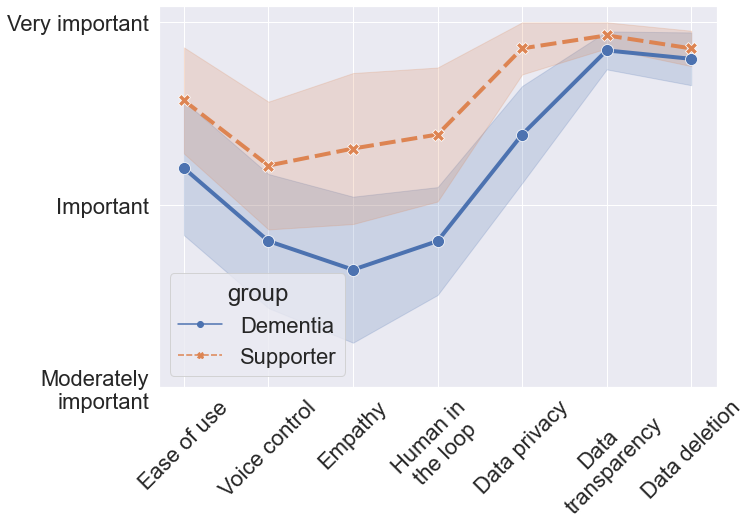

In [145]:
sns.set(rc={'figure.figsize':(10, 7)}, font_scale=2)

sns.set_style("darkgrid")
ax = sns.lineplot(data=mos, y="value", x="variable", 
              hue='group', style='group', errorbar='se', markers=True,
                  linewidth=4, markersize=12,
)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel(''); ax.set_ylabel('')
ax.set_yticks([3, 4, 5])
ax.set_yticklabels(['Moderately\nimportant', 'Important', 'Very important'])

plt.savefig('features_summary.png', bbox_inches='tight', dpi=300)

In [146]:
# Mean opinion scores (averaged within PwD and supporter groups)
mos_mean = mos.groupby(['group', 'variable']).mean()['value']
unstacked = mos_mean.unstack(level=0)
print(unstacked)

group               Dementia  Supporter
variable                               
Data\ntransparency  4.846154   4.928571
Data deletion       4.800000   4.857143
Data privacy        4.384615   4.857143
Ease of use         4.200000   4.571429
Empathy             3.642857   4.307692
Human in\nthe loop  3.800000   4.384615
Voice control       3.800000   4.214286


In [147]:
print('Correlation for MOS Dementia vs Supporter') 
scipy.stats.pearsonr(unstacked['Dementia'], unstacked['Supporter'])

Correlation for MOS Dementia vs Supporter


(0.9444546357841871, 0.0013552716398030527)

In [148]:
df_dementia_encoded = df_dementia.replace({
                    'Prefer not to say':pd.NA, 
                    "It doesn't matter as long as it's securely stored somewhere": pd.NA,
                    "It's doesn’t matter as long as I have access to the data being collected": pd.NA,
                    'Not important': 1,
                    'Slightly important': 2, 
                    'Moderately important': 3, 
                    'Important': 4,
                    'Very important': 5,
                     })

df_supporter_encoded = df_supporter.replace({
                    'Prefer not to say':pd.NA, 
                    "It doesn't matter as long as it's securely stored somewhere": pd.NA,
                    "It's doesn’t matter as long as I have access to the data being collected": pd.NA,
                    'Not important': 1,
                    'Slightly important': 2, 
                    'Moderately important': 3, 
                    'Important': 4,
                    'Very important': 5,
                     })

In [150]:
# for each participant, average the scores across the features & priorities
df_dementia_encoded['feature_average'] = df_dementia_encoded.loc[:, 'Ease of use':'Data deletion'].mean(axis=1)
df_supporter_encoded['feature_average'] = df_supporter_encoded.loc[:, 'Ease of use':'Data deletion'].mean(axis=1)

print(f"Dementia corr(Age, mean response):\n\t {scipy.stats.pearsonr(df_dementia_encoded['Age'], df_dementia_encoded['feature_average'])}")
print(f"Supporter corr(Age, mean response):\n\t {scipy.stats.pearsonr(df_supporter_encoded['Age'], df_supporter_encoded['feature_average'])}")

Dementia corr(Age, mean response):
	 (-0.5430159511557211, 0.03645617381323727)
Supporter corr(Age, mean response):
	 (-0.1963231225105224, 0.5011504399846524)


In [151]:
print(f"Dementia corr(Years since Diagnosed, mean response):\n\t {scipy.stats.pearsonr(df_dementia_encoded['Diagnosed'], df_dementia_encoded['feature_average'])}")

Dementia corr(Years since Diagnosed, mean response):
	 (0.265971464421249, 0.3379876225782603)


In [152]:
tmp = pd.concat((df_dementia_encoded.Sex.replace({'Male':0, 'Female':1, 'Nonbinary':pd.NA}), df_dementia_encoded['feature_average']), axis=1).dropna()
print(f"Dementia corr(Sex, mean response):\n\t {scipy.stats.pearsonr(tmp['Sex'], tmp['feature_average'])}")
tmp = pd.concat((df_supporter_encoded.Sex.replace({'Male':0, 'Female':1, 'Nonbinary':pd.NA}), df_supporter_encoded['feature_average']), axis=1).dropna()
print(f"Supporter corr(Sex, mean response):\n\t {scipy.stats.pearsonr(tmp['Sex'], tmp['feature_average'])}")

Dementia corr(Sex, mean response):
	 (0.34460219379852464, 0.2275995021937349)
Supporter corr(Sex, mean response):
	 (-0.40237102897454546, 0.17286697759603936)


In [153]:
# PwD: Correlation (Age, Response) for each feature & priority
for col in ('Ease of use', 'Voice control', 'Empathy', 'Human in the loop',
            'Data transparency', 'Data privacy', 'Data deletion'):
    tmp = pd.concat((df_dementia_encoded['Age'], df_dementia_encoded[col]), axis=1).dropna(axis=0)
    print(f"{col}:\n\t {scipy.stats.pearsonr(tmp['Age'], tmp[col])}")

Ease of use:
	 (-0.5089857463893295, 0.05265702334654263)
Voice control:
	 (-0.22008962892215417, 0.4305844284030517)
Empathy:
	 (-0.40824581796452775, 0.1472969849233263)
Human in the loop:
	 (-0.02434283534516781, 0.9313773363730573)
Data transparency:
	 (-0.4468324211288976, 0.12582849314129893)
Data privacy:
	 (-0.4822754214217964, 0.09510670587041285)
Data deletion:
	 (-0.035308975661849804, 0.9005828966403845)


In [154]:
# Supporters: Correlation (Age, Response) for each feature & priority
for col in ('Ease of use', 'Voice control', 'Empathy', 'Human in the loop',
            'Data transparency', 'Data privacy', 'Data deletion'):
    tmp = pd.concat((df_supporter_encoded['Age'], df_supporter_encoded[col]), axis=1).dropna(axis=0)
    print(f"{col}:\n\t {scipy.stats.pearsonr(tmp['Age'], tmp[col])}")

Ease of use:
	 (-0.10676675186587042, 0.7163955472685952)
Voice control:
	 (-0.30354511971941495, 0.29141379092033465)
Empathy:
	 (-0.4329725710850251, 0.13945076925089306)
Human in the loop:
	 (-0.09339153092545191, 0.7615374815024057)
Data transparency:
	 (0.5665134014484488, 0.03466959280756309)
Data privacy:
	 (0.3301535054798907, 0.24897534477242728)
Data deletion:
	 (0.21537430979839378, 0.45962145182460484)


In [155]:
# Correlation (Years since Diagnosed, Response) for PwD for each feature & priority
for col in ('Companionship', 'Dementia-related information',
       'Dementia-related information including personal data', 'Navigation',
       'Reading aid', 'Writing aid', 'Therapy aid'):
    tmp = pd.concat((df_dementia_encoded['Diagnosed'], df_dementia_encoded[col]), axis=1)
    tmp = tmp.dropna()
    print(f"{col}:\n\t {scipy.stats.spearmanr(tmp['Diagnosed'], tmp[col])}")

Companionship:
	 SpearmanrResult(correlation=-0.018847136376329194, pvalue=0.9468466437604481)
Dementia-related information:
	 SpearmanrResult(correlation=0.291626424580499, pvalue=0.31170755342081613)
Dementia-related information including personal data:
	 SpearmanrResult(correlation=0.08012012456562227, pvalue=0.7947196000992165)
Navigation:
	 SpearmanrResult(correlation=0.11197580205970206, pvalue=0.7157067506626545)
Reading aid:
	 SpearmanrResult(correlation=0.306269049235277, pvalue=0.2868868885954735)
Writing aid:
	 SpearmanrResult(correlation=0.11842162017226247, pvalue=0.6867967829187193)
Therapy aid:
	 SpearmanrResult(correlation=0.2795804334895753, pvalue=0.3128864864654932)


In [158]:
colormap_devices = {'Laptop/PC':'violet',
        'Tablet':'hotpink',
        'Smartphone; Tablet':'gold',
        'All devices':'gray',
        'Smartphone': 'royalblue', 
       'Smartphone; Laptop/PC':'yellowgreen'} 

device_orders = ['Smartphone', 'Tablet', 'Laptop/PC', 'Smartphone; Tablet', 'Smartphone; Laptop/PC', 'All devices']

# 5.8
for x in df_dementia['Device'].unique():
    print(f"{x}: {sum(df_dementia['Device'] == x)}")
    
draw_feature_pie(df_dementia, 'Device', showlegend=False, colormap=colormap_devices, category_orders=device_orders)

Laptop/PC: 2
Smartphone; Laptop/PC: 1
Tablet: 5
Smartphone: 1
All devices: 4
Smartphone; Tablet: 2


In [159]:


# 5.8
for x in df_supporter['Device'].unique():
    print(f"{x}: {sum(df_supporter['Device'] == x)}")
    
draw_feature_pie(df_supporter, 'Device', showlegend=False, colormap=colormap_devices, 
                category_orders=device_orders)

Laptop/PC: 2
Tablet: 2
Smartphone; Tablet: 2
All devices: 3
Smartphone: 5


<a id="conclusion"></a>
[top](#top)
# Conclusion

In [160]:
colormap_conclusion = {'Very positive':'green',
        'Positive':'palegreen',
        'Neutral or do not know':'mistyrose',
        'Negative':'lightcoral',
        'Very negative': 'red', 
        'Prefer not to say':'gray',
        } 

conclusion_orders = ['Very positive', 'Positive', 'Neutral or do not know', 
                     'Negative', 'Very negative', 'Prefer not to say']


In [161]:
# 6.1
for x in df_dementia['Impact'].unique():
    print(f"{x}: {sum(df_dementia['Impact'] == x)}")
    
draw_feature_pie(df_dementia, 'Impact', colormap=colormap_conclusion, 
                 category_orders=conclusion_orders, showlegend=False)

Prefer not to say: 1
Positive: 5
Neutral or do not know: 4
Very positive: 4
Negative: 1


In [162]:
# 6.1
for x in df_supporter['Impact'].unique():
    print(f"{x}: {sum(df_supporter['Impact'] == x)}")
    
draw_feature_pie(df_supporter, 'Impact', colormap=colormap_conclusion, 
                 category_orders=conclusion_orders, showlegend=False)

Positive: 2
Very positive: 6
Neutral or do not know: 3
Very negative: 3


In [163]:
# 6.1
for x in df_dementia["Comments"].unique():
    if isinstance(x, str):
        print(x, '\n-------')

I have had to answer 'Prefer not to say' in several cases where I would have preferred to give a fuller explanation of my response. For instance in my opinion, in the last question, it is computer apps that would be decisive, rather than AI, especially as far as early diagnosis is concerned (which is the most important thing which would improve the dementia scene. 
-------
It's a provoking issue. 
-------
EMAIL REMOVED 
-------
Currently, dementia care in the UK (and elsewhere) is infected with assumptions of ageism, ableism, racism, classism, homo/bi/transphobia and a host of other biases that are likely to show up in AI development. I would hope that were not the case, but that’s not the world we live in.  
-------
the terrm 'caregiver' is highly obectionable to people with dementia, though it probably siys well with their keepers. People with dementia prefer the term 'supporter' for anyone who is assisting us in making the most of life with the condition. 
-------
A product like thi

In [165]:
# 6.2
for x in df_supporter["Comments"].unique():
    if isinstance(x, str):
        print(x, '\n-------', type(x))

I feel that using the AI app without help from a carer/district nurse or family member would be very difficult for someone in the later stages of dementia.  They would find a PC, smartphone etc very hard to navigate without help.  But, for people with early onset dementia, it could be a valuable tool 
------- <class 'str'>
AI technology will be very important to alleviate isolation, and feelings of loneliness for those living with dementia who do not have family or friends nearby to engage with. AI will also be useful for older adults who may be lonely after the loss of their nearest and dearest and friends.

EMAIL REMOVED 
------- <class 'str'>
EMAIL REMOVED 
------- <class 'str'>
I like the idea of AI for dementia care however I believe it would not be suited to older people with no AI experience. People should start using the planned App as soon  as possible so they are familiar with it even before a diagnosis. I have experience as a family carer which prompted me to do a Batchelor 